In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import seaborn as sns

In [5]:
df=pd.read_csv('hourly completed.csv')

In [9]:
df['timestamp']=pd.to_datetime(df['timestamp'])

In [11]:
df=df[df['timestamp'].dt.year>=2023]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8737 entries, 201624 to 210360
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            8737 non-null   datetime64[ns]
 1   day_of_week          8737 non-null   int64         
 2   hour_of_day          8737 non-null   int64         
 3   is_weekend           8737 non-null   int64         
 4   temperature          8737 non-null   float64       
 5   is_holiday           8737 non-null   int64         
 6   solar_generation     8737 non-null   float64       
 7   load                 8737 non-null   float64       
 8   compensation_method  8737 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 682.6+ KB


In [13]:
df.describe()

,timestamp,day_of_week,hour_of_day,is_weekend,temperature,is_holiday,solar_generation,load
count,8737,8737.000000,8737.000000,8737.000000,8737.000000,8737.000000,8737.000000,8737.000000
mean,2023-07-02 00:00:00,3.000343,11.498684,0.285796,24.800979,0.008241,96.124190,225.923743
min,2023-01-01 00:00:00,0.000000,0.000000,0.000000,5.004464,0.000000,0.002281,166.689824
25%,2023-04-02 00:00:00,1.000000,5.000000,0.000000,18.881964,0.000000,5.414911,208.775592
50%,2023-07-02 00:00:00,3.000000,11.000000,0.000000,25.937820,0.000000,67.064807,226.038747
75%,2023-10-01 00:00:00,5.000000,17.000000,1.000000,30.600176,0.000000,182.421195,244.188430
max,2023-12-31 00:00:00,6.000000,23.000000,1.000000,44.949704,1.000000,299.978715,291.640742
std,NaN,2.000258,6.923280,0.451819,8.474405,0.090409,99.586871,28.999545


In [14]:
df.columns

Index(['timestamp', 'day_of_week', 'hour_of_day', 'is_weekend', 'temperature',
       'is_holiday', 'solar_generation', 'load', 'compensation_method'],
      dtype='object')

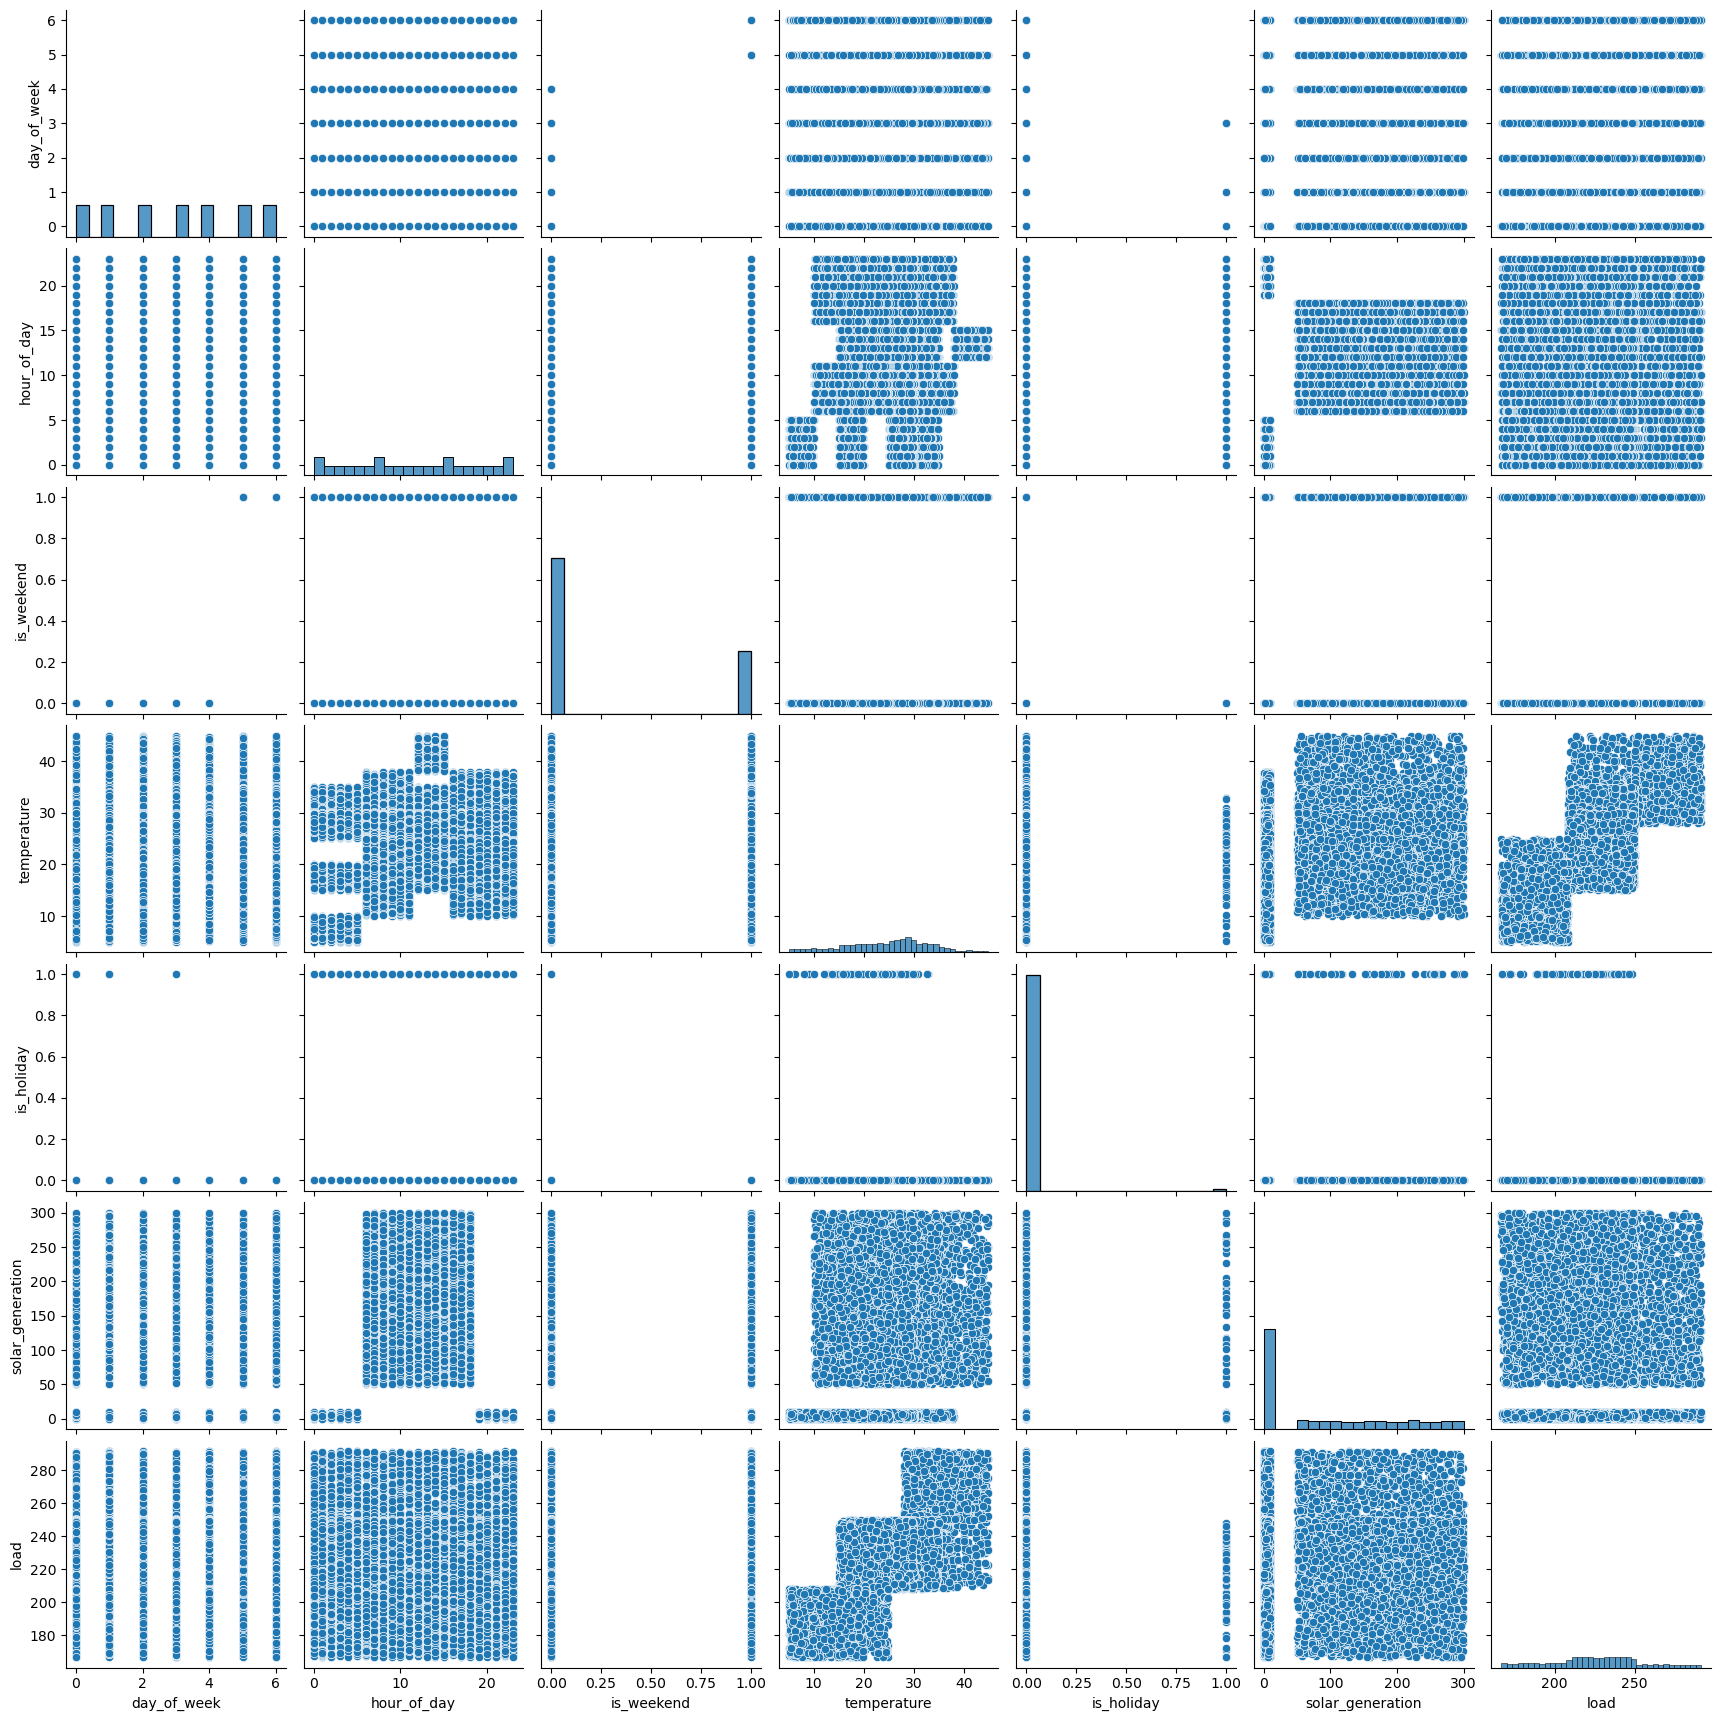

In [15]:
sns.pairplot(data=df)

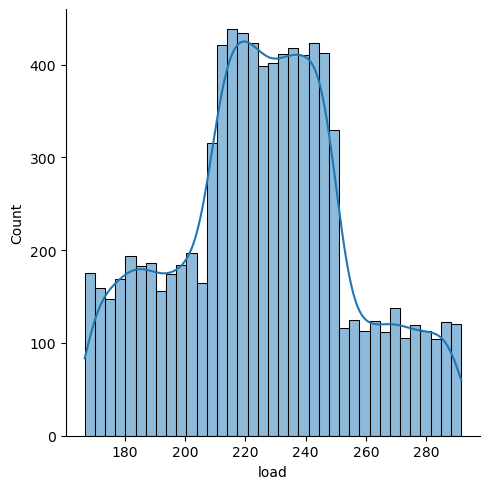

In [17]:
sns.displot(df['load'], kde=True)

In [18]:
sns.heatmap(df.corr())

ValueError: could not convert string to float: 'Normal Operation'

In [19]:
df.columns

Index(['timestamp', 'day_of_week', 'hour_of_day', 'is_weekend', 'temperature',
       'is_holiday', 'solar_generation', 'load', 'compensation_method'],
      dtype='object')

In [30]:
X=df.drop(['timestamp', 'compensation_method'],axis=1)

In [31]:
y=df['load']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.4, random_state=101)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lm=LinearRegression()

In [36]:
lm.fit(X_train, y_train)

LinearRegression()

In [37]:
print(lm.intercept_)

0.0


In [38]:
lm.coef_

array([ 9.93868802e-16, -2.91433544e-16,  1.83186799e-15, -2.35922393e-16,
        2.10281011e-15,  6.93889390e-18,  1.00000000e+00])

In [39]:
X.columns

Index(['day_of_week', 'hour_of_day', 'is_weekend', 'temperature', 'is_holiday',
       'solar_generation', 'load'],
      dtype='object')

In [40]:
pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])

,Coeff
day_of_week,9.938688e-16
hour_of_day,-2.914335e-16
is_weekend,1.831868e-15
temperature,-2.359224e-16
is_holiday,2.102810e-15
solar_generation,6.938894e-18
load,1.000000e+00


In [41]:
from sklearn.datasets import fetch_california_housing

In [42]:
predictions=lm.predict(X_test)

In [43]:
predictions

array([287.68761994, 210.98579201, 248.28731416, ..., 239.99363035,
       236.18958423, 255.13653601])

In [44]:
y_test

205252    287.687620
208322    210.985792
208097    248.287314
207363    240.641909
205763    269.777366
             ...    
205589    285.166532
205956    290.068674
209291    239.993630
203997    236.189584
205665    255.136536
Name: load, Length: 3495, dtype: float64

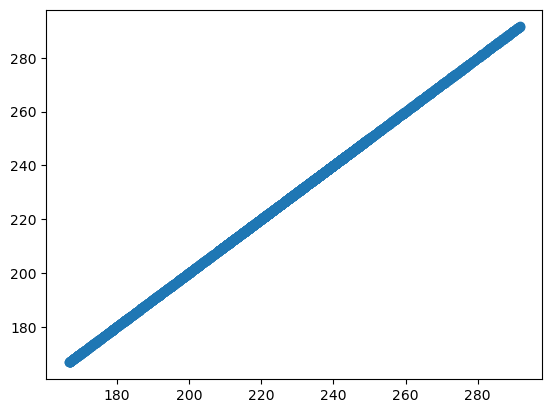

In [45]:
plt.scatter(y_test, predictions)

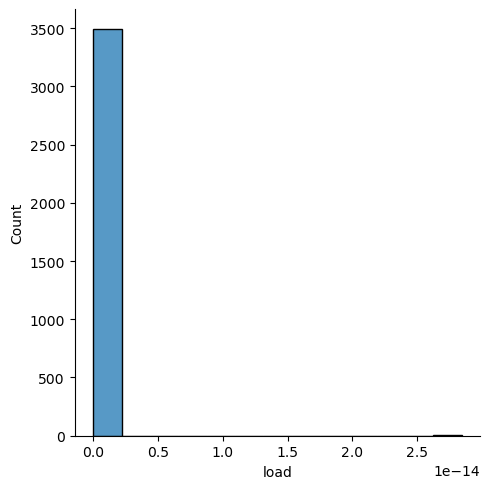

In [46]:
sns.displot((y_test-predictions))

In [47]:
from sklearn import metrics

In [48]:
metrics.mean_absolute_error(y_test, predictions)

4.879263421528585e-17

In [49]:
metrics.mean_squared_error(y_test, predictions)

1.386770072010843e-30

In [50]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

1.177612021003031e-15